In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def sigmoid(x):
    return 0.5*(np.tanh(x) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print ("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print  ("Trained loss:", training_loss(weights))

Initial loss: 2.77258872224
Trained loss: 0.389007543156


In [ ]:
%matplotlib inline
# general imports 
import matplotlib.pyplot as plt
import matplotlib 
#import autograd.numpy as np

import mymacore as ma



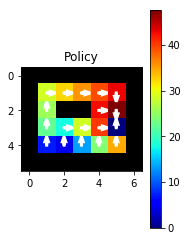

5 0
5 1
5 2
5 3
5

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/Users/wihl/Projects/Courses/17Fall/CS282/cs282-f17-xuefeng-yi-david/playground/autograd/rl_functions.py:376: RuntimeWarning: invalid value encountered in double_scalars
  estimator = np.sum( individual_trial_estimators ) / normalization
/Users/wihl/Projects/Courses/17Fall/CS282/cs282-f17-xuefeng-yi-david/playground/autograd/rl_functions.py:328: RuntimeWarning: invalid value encountered in double_scalars
  w = rho / weights_normalization[ t_within_trial ]
/Users/wihl/Projects/Courses/17Fall/CS282/cs282-f17-xuefeng-yi-david/playground/autograd/rl_functions.py:468: RuntimeWarning: invalid value encountered in double_scalars
  w = rho / weights_normalization[ t_within_trial ]


 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
40 0
40 1
40 2
40 3
40 4
40 5
40 6
40 7
40 8
40 9
40 10
40 11
40 12
40 13
40 14
40 15
40 16
40 17
40 18
40 19
80 0
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
80 11
80 12
80 13
80 14
80 15
80 16
80 17
80 18
80 19
160 0
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
160 11
160 12
160 13
160 14
160 15
160 16
160 17
160 18
160 19
360 0
360 1
360 2
360 3
360 4
360 5
360 6
360 7
360 8
360 9
360 10
360 11
360 12
360 13
360 14
360 15
360 16
360 17
360 18
360 19
640 0
640 1
640 2
640 3
640 4
640 5
640 6
640 7
640 8
640 9
640 10
640 11
640 12
640 13
640 14
640 15
640 16
640 17
640 18
640 19
1280 0
1280 1
1280 2
1280 3
1280 4
1280 5
1280 6
1280 7
1280 8
1280 9
1280 10
1280 11
1280 12
128

In [ ]:
# created by us 
import gridworld 
import sys
sys.path.insert(0, '../')
import rl_functions as rlfun
from gridworld_generate_true_MDP import gridworld_true_MDP

np.set_printoptions( precision = 2 )

# ---------------------- #
#   Different Domains    #
# ---------------------- #
# You can also create your own!  The interpretation of the different symbols is
# the following:
#
# '#' = wall
# 'o' = origin grid cell
# '.' = empty grid cell
# '*' = goal
test_maze = [   # HERE: Make this one bigger, probably! 
    '#########',
    '#..#....#',
    '#..#..#.#',
    '#..#..#.#',
    '#..#.##.#',
    '#....*#.#',
    '#######.#',
    '#o......#',
    '#########']

cliffworld = [
    '#######', 
    '#.....#', 
    '#.##..#', 
    '#o...*#',
    '#XXXXX#', 
    '#######']    

short_hallway = [   
    '###', # '#' = wall
    '#o#', # 'o' = origin grid cell
    '#.#', # '.' = empty grid cell
    '#*#', # '*' = goal
    '###']

long_hallway = [   
    '###', # '#' = wall
    '#o#', # 'o' = origin grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#.#', # '.' = empty grid cell
    '#*#', # '*' = goal
    '###']

simple_grid = [   
    '#######', 
    '#o....#', 
    '#..X..#', 
    '#....*#', 
    '#######']    

# ----------------- #
#   Key Functions   # 
# ----------------- #
# The policy outputs the action for each states 
#def policy( state , Q_table , action_count , epsilon ):
#    if np.random.random() < epsilon:
#        action = np.random.choice( action_count ) 
#    else: 
#        action = np.argmax( Q_table[ state , : ] ) 
#    return action 

# Takes in count table and updates it
def update_count_table( transition_count_table , reward_value_table , state , action , new_state , reward ):
    transition_count_table[ state, action, new_state ] += 1
    reward_value_table[ state, action, new_state ] = reward
    return transition_count_table , reward_value_table 

# Takes in counts and builds an MDP using the RMAX approach (unseen rewards set
# to rmax, use the empirical counts for the transition frequencies)
def build_MDP_RMAX( transition_count_table , reward_value_table , rmax , gamma ):
    state_count = np.shape( transition_count_table )[0]
    action_count = np.shape( transition_count_table )[1]
    state_action_observations = np.sum( transition_count_table, axis = 2 )
    state_action_observations = np.reshape( state_action_observations, 
        ( state_count, action_count, 1) )
    transition_matrix = transition_count_table / np.tile(
            state_action_observations, [ 1, 1, state_count ])
    indices_for_unobserved_transition_probabilities = np.tile(
            state_action_observations == 0, [ 1, 1, state_count ])
    transition_matrix[ indices_for_unobserved_transition_probabilities ] = \
        1/state_count 
    rewards_matrix = np.copy(reward_value_table)
    sas_not_observed = np.sum( transition_count_table, axis = (0,1) ) == 0
    rewards_matrix[ sas_not_observed ] = rmax
    MDP = {
        'T' : transition_matrix,
        'R' : rewards_matrix,
        'gamma' : gamma,
        'state_count' : state_count,
        'action_count' : action_count}
    return MDP

# Takes in counts and samples and MDP 
#def sample_MDP( transition_count_table , reward_value_table , Dirichlet_alpha , default_reward ):
#    state_count = np.shape( transition_count_table )[0]
#    action_count = np.shape( transition_count_table )[1]
#    state_action_observations = np.sum( transition_count_table, axis = 2 )
#    state_action_observations = np.reshape( state_action_observations, 
#        ( state_count, action_count, 1) )
#    transition_matrix = np.zeros( np.shape( transition_count_table ) )
#    for state_ind in range( state_count ):
#        for action_ind in range( action_count ):
#            transition_matrix[ state_ind, action_ind, : ] = \
#                np.random.dirichlet( transition_count_table[ state_ind, action_ind, : ] + \
#                Dirichlet_alpha )
#    rewards_matrix = np.copy(reward_value_table)
#    sas_not_observed = np.sum( transition_count_table, axis = (0,1) ) == 0
#    rewards_matrix[ sas_not_observed ] = default_reward
#    MDP = {
#        'T' : transition_matrix,
#        'R' : rewards_matrix,
#        'gamma' : gamma,
#        'state_count' : state_count,
#        'action_count' : action_count}
#    return MDP

# Solve MDP
def solve_MDP( MDP ):
    state_count = MDP['state_count']
    action_count = MDP['action_count']
    T = MDP['T']
    R = MDP['R']
    gamma = MDP['gamma']
    Q_table = np.zeros( ( state_count, action_count ) )
    V = np.zeros( state_count )
    for iter_number in range(200):
        for state_ind in range( state_count ):
            for action_ind in range( action_count ):
                expected_reward = np.sum(T[ state_ind, action_ind, : ] * \
                    R[ state_ind, action_ind, : ] )
                expected_value_of_next_state = np.sum( T[ state_ind, action_ind, : ] * V )
                Q_table[ state_ind, action_ind ] = expected_reward + \
                    gamma * expected_value_of_next_state
            V[ state_ind ] = np.max( Q_table[ state_ind, :] )
    return Q_table

# -------------------- #
#   Create the Task    #
# -------------------- #
# Task Parameters for gridworld 
task_name = cliffworld
action_error_prob = 0.2
pit_reward = -50
task = gridworld.GridWorld( task_name ,
                            action_error_prob=action_error_prob, 
                            rewards={'*': 50, 'moved': -1, 'hit-wall': -1,'X':pit_reward} ,
                            terminal_markers='*' )        

gamma = 0.95
state_count = task.num_states  
action_count = task.num_actions 
true_MDP = gridworld_true_MDP( task_name, action_error_prob, pit_reward, gamma )
Q_table = solve_MDP( true_MDP )

# -------------- #
#   Make Plots   #
# -------------- #
# Note, these are plots that are useful for visualizing the policies
# and the value functions, which can help you identify bugs.  You can
# also use them as a starting point to create the plots that you will
# need for your homework assignment.

# Util to make an arrow 
# The directions are [ 'north' , 'south' , 'east' , 'west' ] 
def plot_arrow( location , direction , plot ):

    arrow = plt.arrow( location[0] , location[1] , dx , dy , fc="k", ec="k", head_width=0.05, head_length=0.1 )
    plot.add_patch(arrow) 

# Useful stats for the plot
row_count = len( task_name )
col_count = len( task_name[0] ) 
value_function = np.reshape( np.max( Q_table , 1 ) , ( row_count , col_count ) )
policy_function = np.reshape( np.argmax( Q_table , 1 ) , ( row_count , col_count ) )
wall_info = .5 + np.zeros( ( row_count , col_count ) )
wall_mask = np.zeros( ( row_count , col_count ) )
for row in range( row_count ):
    for col in range( col_count ):
        if task_name[row][col] == '#':
            wall_mask[row,col] = 1     
wall_info = ma.masked_where( wall_mask==0 , wall_info )
value_function *= (1-wall_mask)**2

# value function plot 
plt.subplot( 1 , 2 , 2 ) 
plt.imshow( value_function , interpolation='none' , cmap=matplotlib.cm.jet )
plt.colorbar()
plt.imshow( wall_info , interpolation='none' , cmap=matplotlib.cm.gray )
plt.title( 'Value Function' )

# policy plot 
# plt.imshow( 1 - wall_mask , interpolation='none' , cmap=matplotlib.cm.gray )    
for row in range( row_count ):
    for col in range( col_count ):
        if wall_mask[row][col] == 1:
            continue 
        if policy_function[row,col] == 0:
            dx = 0; dy = -.5
        if policy_function[row,col] == 1:
            dx = 0; dy = .5
        if policy_function[row,col] == 2:
            dx = .5; dy = 0
        if policy_function[row,col] == 3:
            dx = -.5; dy = 0
        plt.arrow( col , row , dx , dy , shape='full', fc='w' , ec='w' , lw=3, length_includes_head=True, head_width=.2 )
plt.title( 'Policy' )        
plt.show( block=False ) 

# -------------------------- #
# Off-policy evaluation part #    
# -------------------------- #

episode_count__list = [ 5, 10, 20, 40, 80, 160, 360, 640, 1280, 2560 ]
num_of_tests = 20
epsilon = 0.2
pi_optimal = np.argmax( Q_table, axis = 1 )
pi_optimal = rlfun.turn_policy_to_stochastic_policy(
    pi_optimal, num_of_states = state_count, num_of_actions = action_count )
pi_random  = np.ones( (state_count, action_count) ) / action_count
pi_eps_greedy = pi_optimal * ( 1 - epsilon ) + epsilon / 4
pi_behavior = pi_eps_greedy
pi_eval = pi_optimal
#pi_behavior = pi_random
#pi_eval = pi_random


IS__list__list = []
PDIS__list__list = []
PDDR__list__list = []
WIS__list__list = []
PDWIS__list__list = []
PDWDR__list__list = []

max_task_iter = 100
rmax = task.get_max_reward()

for episode_count in episode_count__list:
    IS__list = []
    PDIS__list = []
    PDDR__list = []
    WIS__list = []
    PDWIS__list = []
    PDWDR__list = []
    for test_count in range(num_of_tests):
        global_task_iter = 0
        states_sequence = []
        actions_sequence = []
        rewards_sequence = []
        fence_posts = []
        transition_count_table = np.zeros( ( state_count , action_count , state_count ) )
        reward_value_table = np.zeros( ( state_count , action_count , state_count ) )
        print(episode_count, test_count)
        # Loop until the episode is done 
        for episode_iter in range( episode_count ):
            fence_posts += [ global_task_iter ]
            # Start the task 
            task.reset()
            state = task.observe() 
            action = np.random.choice( 4, 1, p = pi_behavior[ state, : ] )[0]
            episode_reward_list = []
            task_iter = 0 
        
            # Loop until done
            while task_iter < max_task_iter:
                global_task_iter += 1
                task_iter = task_iter + 1 
                new_state, reward = task.perform_action( action )
                new_action = np.random.choice( 4, 1, p = pi_behavior[ new_state, : ] )[0] 
        
                # Cases for the different algorithms 
                transition_count_table , reward_value_table = update_count_table( transition_count_table , reward_value_table , state , action , new_state , reward )
        
                # store the data
                episode_reward_list.append( reward ) 
                
                states_sequence += [ state ]
                actions_sequence += [ action ]
                rewards_sequence += [ reward ]

                # stop if at goal/else update for the next iteration 
                if task.is_terminal( state ):
                    break
                else:
                    state = new_state
                    action = new_action
            
                    
        MDP = build_MDP_RMAX( transition_count_table , reward_value_table , rmax , gamma )
        V, Q = rlfun.policy_evaluation(
                MDP['T'] , MDP['R'] , pi_eval , gamma , theta = 0.01 )
        
        IS, _ = rlfun.off_policy_importance_sampling(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, state_count,
            action_count)
        PDIS, _ = rlfun.off_policy_per_decision_importance_sampling(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, state_count,
            action_count)
        PDDR, _ = rlfun.off_policy_per_decision_doubly_robust(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, V, Q, state_count,
            action_count)
        WIS, ite = rlfun.off_policy_weighted_importance_sampling(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, state_count,
            action_count)
        PDWIS, ite = rlfun.off_policy_per_decision_weighted_importance_sampling(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, state_count,
            action_count)
        PDWDR, ite = rlfun.off_policy_per_decision_weighted_doubly_robust(
            states_sequence, actions_sequence, rewards_sequence,
            fence_posts, gamma, pi_eval, pi_behavior, V, Q, state_count,
            action_count)
        IS__list += [ IS ]
        PDIS__list += [ PDIS ]
        PDDR__list += [ PDDR ]
        WIS__list += [ WIS ]
        PDWIS__list += [ PDWIS ]
        PDWDR__list += [ PDWDR ]
    IS__list__list += [ IS__list ]
    PDIS__list__list += [ PDIS__list ]
    PDDR__list__list += [ PDDR__list ]
    WIS__list__list += [ WIS__list ]
    PDWIS__list__list += [ PDWIS__list ]
    PDWDR__list__list += [ PDWDR__list ]
    
IS__list__list = np.asarray(IS__list__list)
PDIS__list__list = np.asarray(PDIS__list__list)
PDDR__list__list = np.asarray(PDDR__list__list)
WIS__list__list = np.asarray(WIS__list__list)
PDWIS__list__list = np.asarray(PDWIS__list__list)
PDWDR__list__list = np.asarray(PDWDR__list__list)

V__true, Q__true = rlfun.policy_evaluation(
                true_MDP['T'] , true_MDP['R'] , pi_eval , gamma , theta = 0.01 )
actual_policy_value = V__true[ task.maze.flat_positions_containing('o')[0] ]
plt.figure()
plt.errorbar( episode_count__list, np.mean(IS__list__list, axis = 1 ),
             yerr = np.std(IS__list__list, axis = 1 ) )
plt.errorbar( episode_count__list, np.mean(PDIS__list__list, axis = 1 ),
             yerr = np.std(PDIS__list__list, axis = 1 ) )
plt.errorbar( episode_count__list, np.mean(PDDR__list__list, axis = 1 ),
             yerr = np.std(PDDR__list__list, axis = 1 ) )
plt.errorbar( episode_count__list, np.mean(WIS__list__list, axis = 1 ),
             yerr = np.std(WIS__list__list, axis = 1 ) )
plt.errorbar( episode_count__list, np.mean(PDWIS__list__list, axis = 1 ),
             yerr = np.std(PDWIS__list__list, axis = 1 ) )
plt.errorbar( episode_count__list, np.mean(PDWDR__list__list, axis = 1 ),
             yerr = np.std(PDWDR__list__list, axis = 1 ) )
plt.plot(episode_count__list, actual_policy_value*np.ones(
        len(episode_count__list)))
plt.xscale('log')
plt.xlabel('episodes')
plt.ylabel('estimator value')

IS__squared_error = (IS__list__list - actual_policy_value)**2
PDIS__squared_error = (PDIS__list__list - actual_policy_value)**2
PDDR__squared_error = (PDDR__list__list - actual_policy_value)**2
WIS__squared_error = (WIS__list__list - actual_policy_value)**2
PDWIS__squared_error = (PDWIS__list__list - actual_policy_value)**2
PDWDR__squared_error = (PDWDR__list__list - actual_policy_value)**2
plt.figure()
plt.plot( episode_count__list, np.mean(IS__squared_error, axis = 1 ), label = 'IS' )
plt.plot( episode_count__list, np.mean(PDIS__squared_error, axis = 1 ), label = 'PDIS' )
plt.plot( episode_count__list, np.mean(PDDR__squared_error, axis = 1 ), label = 'PDDR' )
plt.plot( episode_count__list, np.mean(WIS__squared_error, axis = 1 ), label = 'WIS' )
plt.plot( episode_count__list, np.mean(PDWIS__squared_error, axis = 1 ), label = 'PDWIS' )
plt.plot( episode_count__list, np.mean(PDWDR__squared_error, axis = 1 ), label = 'PDWDR' )
#plt.plot( episode_count__list, 50*(np.array(episode_count__list)+0.0)**-1, 'm' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('episodes')
plt.ylabel('MSE')
plt.legend( loc = 3 )